<a href="https://colab.research.google.com/github/vilsonrodrigues/DataScience/blob/master/NetworkX_tutorial_de_grafos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Os objetos são os **vértices** ou **nós** (**node**, em inglês) do grafo

Os relacionamentos entre eles são as **arestas** (**edge**, em inglês)



Importando bibliotecas

In [0]:
import networkx as nx
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

**Existem 4 tipos de grafos**


*   Graph: Esta classe implementa um gráfico não direcionado. Ele ignora várias arestas entre dois nós. Ele permite arestas de auto-loop entre um nó e ele próprio.

*   DiGraph: Gráficos direcionados, ou seja, gráficos com arestas direcionadas. Fornece operações comuns a gráficos direcionados (uma subclasse de Graph).

*   MultiGraph: Uma classe de gráfico flexível que permite várias arestas não direcionadas entre pares de nós. A flexibilidade adicional leva a alguma degradação no desempenho, embora geralmente não seja significativa.

*   MultiDiGraph: Uma versão direcionada de um MultiGraph.



Criando Graph

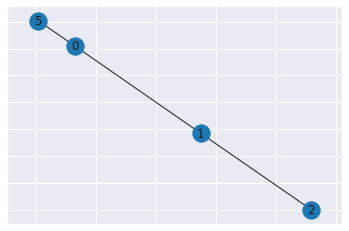

In [0]:
G = nx.Graph()
G.add_edge(0,1)
G.add_edge(1,2)
G.add_edge(0,5,weight=20.9) #parametro weight deixa as conexões mais longes ou próximas
plt.figure()
nx.draw_networkx(G)
#Os números nos Node representam a posição e não a sequência dele

Usando letras para representar os nodes

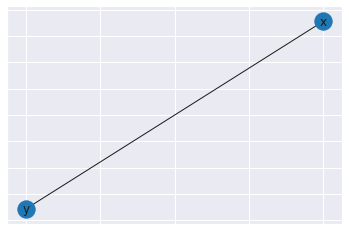

In [0]:
G = nx.Graph()
G.add_edge('y', 'x')
nx.draw_networkx(G)

Usando edge_from

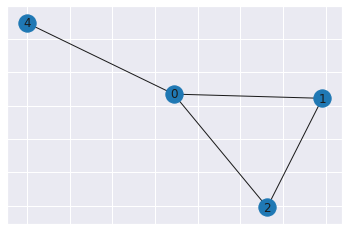

In [0]:
G = nx.Graph()
G.add_edges_from([(0,1), (1,2), (0,4), (2,0)])
plt.figure()
nx.draw_networkx(G)

Passando uma lista como edge

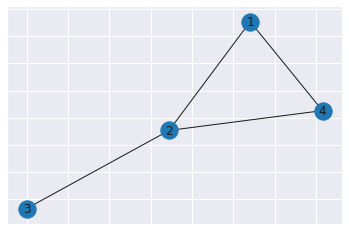

In [0]:
G = nx.Graph()
lista = [(1, 2), (2, 3), (1, 4), (4, 2)]
G.add_edges_from(lista)
nx.draw_networkx(G)

Passando como lista e o peso das distâncias no weighted edges

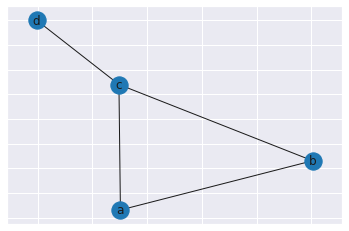

In [0]:
G = nx.Graph()
lista = [('a', 'b', 5.0), ('b', 'c', 3.0), ('a', 'c', 1.0), ('c', 'd', 7.3)] 
G.add_weighted_edges_from(lista) #como eu inseri como o do tipo weighted_edges ele entende o último parametro como o "peso" do nó
nx.draw_networkx(G)

Num node_from inserindo uma string ele separa automaticamente

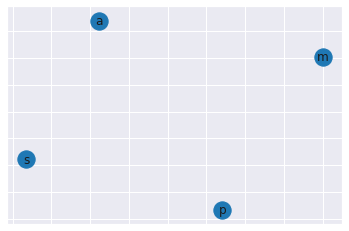

In [0]:
G = nx.Graph()
G.add_nodes_from("spam")
nx.draw_networkx(G)

Passando uma lista com o tamanho dos nodes

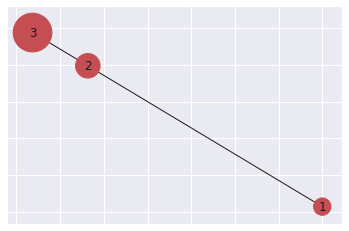

In [0]:
G1 = nx.Graph()
tam = [300,600,1500]
G1.add_edges_from([(1, 2, {'color': 'black'}), (2, 3, {'weight': 48})])
nx.draw_networkx(G1,node_color='r',node_size=tam)

**Inserindo um estado dentro de um node**

In [0]:
G = nx.DiGraph()
G.add_node(1)
G.nodes[1]["room"] = 148
G.nodes[1]["room"]

148

Inserindo como uma lista

In [0]:
estados = ["1","2"]
G.add_node(1)
G.nodes[1]["state"] = estados

**Cores**

Insere uma cor padrão para todos os nodes no draw networkx

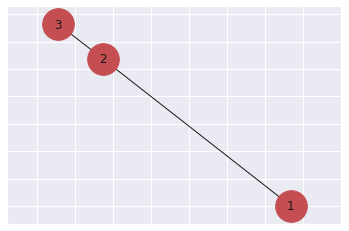

In [0]:
G1 = nx.Graph()
G1.add_edges_from([(1, 2, {'color': 'black'}), (2, 3, {'weight': 48})])
nx.draw_networkx(G1,node_color='r',node_size=1000)
plt.show()

Inserido cores como uma lista

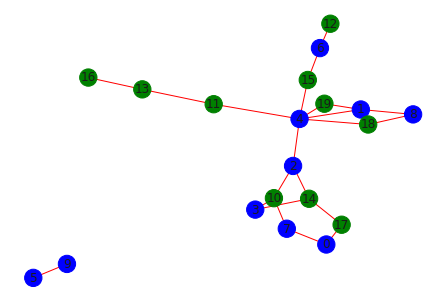

['blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green']


In [0]:
G = nx.erdos_renyi_graph(20,0.1)
color_map = []
for node in G:
    if node <10:
        color_map.append("blue")
    else: color_map.append("green")      
nx.draw(G,node_color = color_map,with_labels = True,edge_color="red") #passando a cor dos edges
plt.show()
print (color_map)

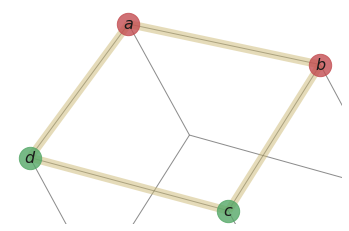

In [0]:
G = nx.cubical_graph()
pos = nx.spring_layout(G)
nx.draw_networkx_nodes(G,pos,
                       nodelist=[0, 1],
                       node_color='r',
                       node_size=500,
                       alpha=0.8)
nx.draw_networkx_nodes(G,pos,
                       nodelist=[2,3],
                       node_color='g',
                       node_size=500,
                       alpha=0.8)

nx.draw_networkx_edges(G, pos, width=1.0, alpha=0.5)
nx.draw_networkx_edges(G, pos,
                       edgelist=[(0, 1), (1, 2), (2, 3), (3, 0)],
                       width=8, alpha=0.5, edge_color='y')

labels = {}
labels[0] = r'$a$'
labels[1] = r'$b$'
labels[2] = r'$c$'
labels[3] = r'$d$'

nx.draw_networkx_labels(G, pos, labels, font_size=16)

plt.axis('off')
plt.show()

**Criando DiGraph**

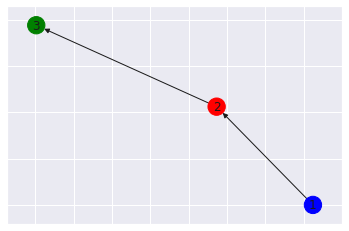

In [0]:
G2 = nx.DiGraph()
color_map = ["blue","red","green"]
G2.add_edges_from([(1, 2), (2, 3)])
nx.draw_networkx(G2,node_color=color_map,with_labels = True)

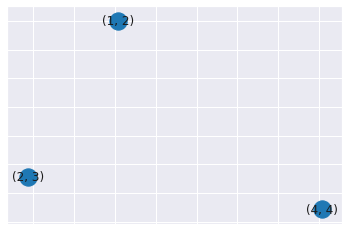

In [0]:
G = nx.DiGraph()
#color_map = ["blue","red","green"]
G.add_nodes_from([(1, 2), (2, 3), (1,2), (4,4)])
nx.draw_networkx(G,with_labels = True)

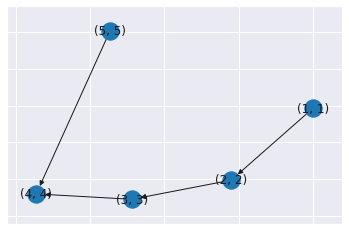

In [0]:
G = nx.DiGraph()
#color_map = ["blue","red","green"]
#G.add_nodes_from([(1, 2), (2, 3)])

G.add_edges_from([
                  ((1,1), (2,2)), ((2,2), (3,3)), ((3,3),(4,4)) , ((5,5),(4,4)), ((3,3),(4,4))
                
                ])
G.add_nodes_from([
                  
                  ])
nx.draw_networkx(G,with_labels = True)


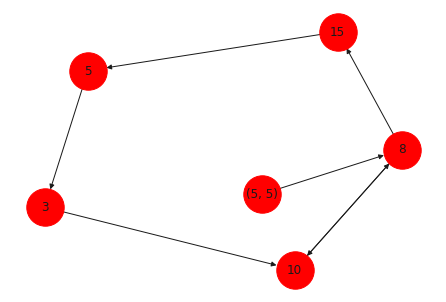

In [0]:
G = nx.DiGraph()

G.add_edge((5,5),8)
G.add_edge(10,8)
G.add_edge(8,10)
G.add_edge(8,15)
G.add_edge(15,5)
G.add_edge(5,3)
G.add_edge(3,10)

nx.draw(G,with_labels = True,node_color="red",node_size=1400)

In [0]:
G = nx.DiGraph()

color_map = ["gray","red","green"]
G.add_edges_from([((1,2),(2,3)),
                  ((2,3),(5,6))])
G.add_edges_from([((5,6),(7,8)),
                  ((7,8),(8,10))])



nx.draw_networkx(G,node_size=500,node_color=color_map,font_size=10,alpha=0.9)
nx.draw_networkx(G1,node_size=500,node_color=color_map,font_size=10,alpha=0.9)

Grade 2D de grafo

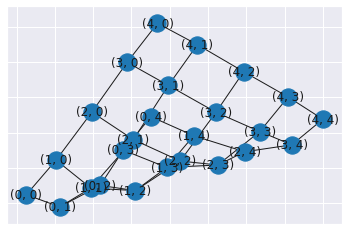

In [0]:
G1 = nx.grid_2d_graph(5,5)
nx.draw_networkx(G1)

In [0]:
G = nx.DiGraph()
#color_map = ["blue","red","green"]
G.add_edges_from([(1, 2), (2, 3)])
G.add_edges_from([(7, 3), (3, 4)])
nx.draw_networkx(G,node_color=color_map,with_labels = True,node_size=500)

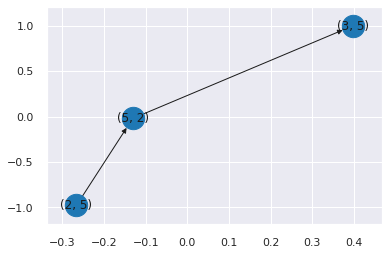

In [0]:
G = nx.DiGraph()

G.add_node((2,5))
G.add_node((5,2))
G.add_node((3,5))
G.add_edge((2,5),(5,2))
G.add_edge((5,2),(3,5))
nx.draw_networkx(G,node_size=500,edge_size=1,ax=ax)
ax.tick_params(length=10,width=3,labelleft=True, labelbottom=True)
#ax.tick_params(left=True, bottom=True, labelleft=True, labelbottom=True)

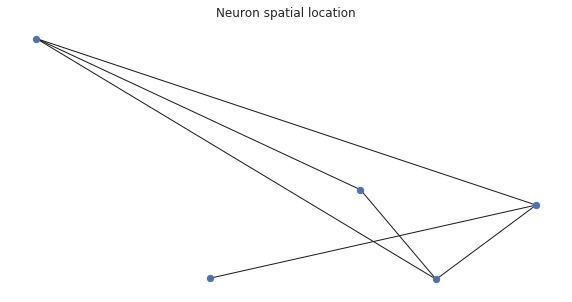

In [0]:

fig, ax = plt.subplots(figsize=(10, 5))
plt.title('Neuron spatial location')
ax.set_axis_on()
Adj = np.random.randint(0,2,(5,5))

x = np.random.uniform(0,1,5)
y = np.random.uniform(0,1,5)
# convert to list of tuples
M_pos = list(zip(x,y))
# give each neuron a number, and put in a dictionary
nums = list(range(0,5))
pos_dict = dict(zip(nums,M_pos))
# construct the graph from the neuron positions and adjacency matrix
GR = nx.from_numpy_matrix(Adj, pos_dict);

#figure(figsize=(10, 5))
plt.title('Neuron spatial location')
#nx.draw_networkx_labels(GR, pos_dict)
nx.draw(GR, pos_dict, node_size=40, node_color='b')

Remover um node

In [0]:
G.remove_edge(1, 3) #serve para todos os outros

Lista de adjacentes a um node

In [0]:
list(G.adj[1])

Verifica a quantidade de nodes e edges

In [0]:
G.number_of_nodes()
G.number_of_edges()

Comando para limpar os edges e node de uma variavel

In [0]:
G.clear()

In [0]:
#ideia de como fazer
G.add_node(1, time='5pm')
G.node[1]
{'time': '5pm'}
>>> G.node[1]['room'] = 714

#Resto

Inserindo 2 nós e uma borda

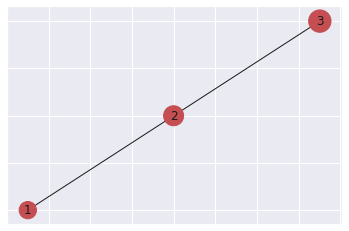

In [0]:
G1 = nx.Graph()
G1.add_edges_from([(1, 2), (2, 3)])
tam = [300,400,500]
nx.draw_networkx(G1,node_color='r',node_size=tam)
plt.show()

In [0]:
#G.add_node(2)
#G.add_node(5)
#G.add_edge(2,5)
#G.add_edge(4,1)
#G.add_edges_from([(2,5),(5,3)],{'color': 'red'})
G.add_nodes_from([(2, {"color": "black"})])
#G.add_edges_from([(5,3),(6,4)])

In [0]:

nx.draw(G,pos,node_color=range(24),node_size=800,cmap=plt.cm.Blues)
plt.figure(figsize=(8,8))
plt.xlim(-0.05,1.05)
plt.ylim(-0.05,1.05)
plt.axis('off')
edge_color='r'

https://networkx.github.io/documentation/networkx-1.10/reference/generated/networkx.generators.classic.grid_graph.html

Desenhando o grafo

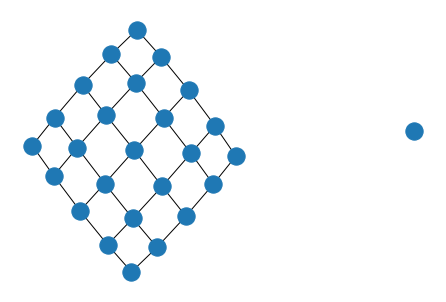

In [0]:
nx.draw(G)
plt.show()

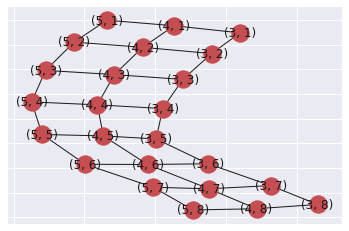

In [0]:
from networkx import grid_graph
#G = grid_graph(dim=[2, 3, 4,5,6,7,])
G = grid_graph(dim=[range(1, 9), range(3, 6)])
nx.draw_networkx(G,node_color='r')
